# 标量（0D张量）

In [10]:
import numpy as np

In [11]:
# 仅包含一个数字的张量叫做标量（scalar）

In [12]:
x = np.array(12)

In [13]:
x

array(12)

In [14]:
# 查看张量轴的个数

In [15]:
x.ndim

0

# 向量（1D张量）

In [17]:
# 数字组成的数组叫做向量（vector），前提是要组成的数数组，所以必须有[]

In [18]:
x = np.array([12, 3, 6, 14, 7])

In [19]:
x

array([12,  3,  6, 14,  7])

In [20]:
x.ndim

1

# 矩阵（2D张量）

In [1]:
# 向量组成的数组叫做矩阵（matrix）,向量需要组成数组才是矩阵

In [23]:
x = np.array([
    [5, 78, 2, 34, 0],
    [6, 79, 3, 35, 1],
    [7, 80, 4, 36, 2]
])

In [24]:
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [26]:
# 第1个轴上的元素叫做行（row），第2个轴上的元素叫做列（column）

In [27]:
x.ndim

2

# 3D张量与更高维张量

In [28]:
# 将多个矩阵组合成一个新的数组可以得到一个3D张量，我们可以直观的理解为数字组成的立方体，依旧是数组

In [29]:
x = np.array([
    [
            [5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]
    ],
    [
            [5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]
    ],
    [
            [5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]
    ]
])

In [30]:
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [31]:
x.ndim

3

In [32]:
# 将多个3D张量组合成一个数组，可以创建一个4D张量，以次类推。深度学习处理的一般是0D到4D的张量，但处理视频数据时可能会遇到5D张量

# 关键属性

In [33]:
from keras.datasets import mnist

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [36]:
# 张量train_images的轴的个数，即ndim属性

In [37]:
train_images.ndim

3

In [38]:
# 形状

In [39]:
train_images.shape

(60000, 28, 28)

In [40]:
# 数据类型

In [41]:
train_images.dtype

dtype('uint8')

In [42]:
# 所以train_images是一个由8位整数组成的3D张量。确切的说是60000个矩阵组成的数组，每个矩阵有28*28个整数组成。

# 显示第4个数字

In [43]:
digit = train_images[4]

In [44]:
import matplotlib.pyplot as plt

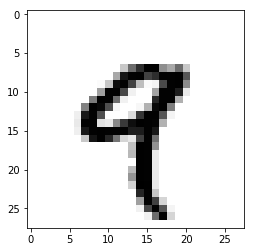

In [45]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# 在Numpy中操作张量

In [48]:
# 选择第10~100个数字（不包括第100个），并将其放在形状为(90, 28, 28)的数组中

In [49]:
my_slice = train_images[10:100]

In [50]:
my_slice.shape

(90, 28, 28)

In [51]:
# 上述写法等同于如下更复杂的写法

In [54]:
my_slice = train_images[10:100, :, :]  # :等同于选择整个轴

In [55]:
my_slice.shape

(90, 28, 28)

In [57]:
# 同样等同于上述写法

In [58]:
my_slice = train_images[10:100, 0:28, 0:28]

In [59]:
my_slice.shape

(90, 28, 28)

In [60]:
# 一般来说，你可以沿着每个张量轴在任意两个索引之间进行选择

In [61]:
my_slice = train_images[:, 14:, 14:]

In [62]:
my_slice.shape

(60000, 14, 14)

In [63]:
# 可以使用负数索引

In [64]:
my_slice = train_images[:, 7:-7, 7:-7]

In [65]:
my_slice.shape

(60000, 14, 14)

# 数据批量的概念

In [66]:
# 不会同时处理整个数据集，而是将数据拆分成小批量

In [67]:
batch = train_images[:128]

In [72]:
# 然后下一个批量

In [73]:
batch = train_images[128:256]

In [74]:
# 然后是第n个批量

In [76]:
batch = train_images[128 * n:128 * (n + 1)]

# 现实世界中的数据张量

In [78]:
"""
向量数据：2D张量，形状为(samples, features)
时间序列数据或时序数据：3D张量，形状为(samples, timesteps, features)
图像：4D张量，形状为(samples, height, width, channels)或(samples, channels, height, width)
视频：5D张量，形状为(samples, frames, height, width, channels)或(samples, frames, channels, height, width)
"""

# 逐元素运算

In [87]:
# relu运算和加法运算都是逐元素运算，这使得其非常适合向量化运算。

In [5]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()  # 避免覆盖输入张量
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)  # 矩阵x的ij个元素和0比较大小
    return x

In [6]:
import numpy as np

In [7]:
test = np.array([[-1, 2],
               [2, 4]])

In [8]:
test.shape

(2, 2)

In [11]:
len(test.shape)  # 可以通过计算test的shape元组的大小来断言test是一个2D张量

2

In [17]:
naive_relu(x=test)

array([[0, 2],
       [2, 4]])

In [18]:
# 对于加法采用同样的实现方法

In [19]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [20]:
y = np.array([[1, 3], 
              [4, 4]])

In [21]:
y

array([[1, 3],
       [4, 4]])

In [22]:
naive_add(x=test, y=y)

array([[0, 5],
       [6, 8]])

In [23]:
# 在NumPy中可以直接进行逐元素计算，速度非常快

In [27]:
# 逐元素相加

In [29]:
z = test + y

In [30]:
# 逐元素relu

In [31]:
z = np.maximum(z, 0.)

In [32]:
z

array([[0., 5.],
       [6., 8.]])

# 广播

In [2]:
# 当一个2D张量与一个向量相加时，形状必须相同，此时显然不行。我们可以通过广播的办法，将较小的张量广播以匹配较大张量的形状进行逐元素运算

In [3]:
# 想象将向量沿着新轴重复10次，是一种很有用的思维模型。

In [12]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [13]:
x = np.array([
    [1, 2],
    [2, 4]
])

In [19]:
x

array([[1, 2],
       [2, 4]])

In [14]:
len(x.shape)

2

In [15]:
y = np.array([1, 3])

In [16]:
y

array([1, 3])

In [17]:
len(y.shape)

1

In [18]:
naive_add_matrix_and_vector(x=x, y=y)

array([[2, 5],
       [3, 7]])

In [20]:
# 利用广播将逐元素的maximum运算应用于两个形状不同的张量

In [21]:
# 生成形状为(64, 3, 32, 10)的随机张量

In [48]:
x = np.random.random((64, 3, 32, 10))  # 这里表示形状我(32,10)的矩阵，每3个为一组，共计64组

In [49]:
y = np.random.random((32, 10))

In [50]:
z = np.maximum(x, y)

In [53]:
z.shape  # 输出z的形状与x相同，说明经过广播后矩阵可计算

(64, 3, 32, 10)

# 张量点积

In [56]:
# 张量点积又名张量积，需要维度对其才能相乘

In [59]:
x = np.array([
    [1, 2],
    [3, 8],
    [4, 3]
])

In [60]:
x.shape

(3, 2)

In [61]:
y = np.array([
    [1, 3, 4],
    [5, 6, 2]
])

In [62]:
y.shape

(2, 3)

In [63]:
z = np.dot(x, y)

In [64]:
z

array([[11, 15,  8],
       [43, 57, 28],
       [19, 30, 22]])

In [65]:
# 向量x和y之间的点积

In [86]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1, 'x的轴数要为1'
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [90]:
x = np.array([1, 2])

In [91]:
y = np.array([1, 1])

In [92]:
naive_vector_dot(x, y)

3.0

In [73]:
# 矩阵与向量做点积

In [93]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    # 返回一个全是0的向量，其形状与x.shape[0]相同
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [94]:
x = np.array([
    [2, 1],
    [3, 2]
])

In [99]:
y = np.array([3, 1])  # 列向量

In [100]:
naive_matrix_vector_dot(x, y)

array([[25, 29, 22],
       [65, 79, 50],
       [19, 30, 22]])

In [101]:
# 矩阵-向量点积与向量点积之间的关系

In [108]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z   

In [109]:
naive_matrix_vector_dot(x, y)

array([ 7., 11.])

In [110]:
# 矩阵点积

In [112]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    # 初始化零矩阵
    z = np.zeros((x.shape[0], y.shape[1]))  # 返回零矩阵要再加一个括号
    for i in range(x.shape[0]):  # 遍历x的所有行
        for j in range(y.shape[1]):  # 遍历y的所有列
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z
            

In [113]:
x = np.array([
    [1, 4],
    [3, 3]
])

In [114]:
y = np.array([
    [3, 2, 5],
    [2, 0, 8]
])

In [115]:
naive_matrix_dot(x, y)

array([[11.,  2., 37.],
       [15.,  6., 39.]])

In [118]:
x = np.array([
    [1, 2, 3, 4],
    [2, 6, 4, 0]
])

In [119]:
x

array([[1, 2, 3, 4],
       [2, 6, 4, 0]])

In [120]:
x[1,:]  # 一个逗号表示一维

array([2, 6, 4, 0])

# 张量变形

In [121]:
# 张量变形是指改变张量的行和列，以得到想要的形状，张量的元素个数不变

In [122]:
x = np.array([
    [0., 1.],
    [2., 3.],
    [4., 5.]
])

In [123]:
x.shape

(3, 2)

In [124]:
x = x.reshape(6, 1)

In [125]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [130]:
x = x.reshape(2, 3)

In [131]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [132]:
# 经常遇到的一种张量变形方式是转置（transposition），即行列互换，使得x[i, :] x[:, i]

In [139]:
# 创建两行三列的零矩阵

In [147]:
x = np.zeros((2, 3))

In [148]:
x

array([[0., 0., 0.],
       [0., 0., 0.]])

In [149]:
# 转置

In [150]:
x_t = np.transpose(x)

In [151]:
x_t

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [152]:
import tensorflow as tf

In [153]:
a = tf.constant([1, 2, 3], name='a')
b = tf.constant([2, 3, 2], name='b')

In [154]:
result = a+b

<tf.Tensor 'a:0' shape=(3,) dtype=int32>